In [2]:
#导入相关库
import torch
import numpy as np
import pandas as pd#用于数据处理
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from torch.autograd import Variable#自动求导
import torch.nn.functional as F

In [3]:
#读取数据
region = pd.read_csv("./region.csv")
region_d = region[['x1','x2','x3','x4']]
region['target'] = region['y']
print(region)

    id     x1      x2    x3    x4  y  target
0    1  10265   30.81  6235  3223  2       2
1    2   8164   49.13  4929  2406  2       2
2    3   3376   77.76  3921  1668  0       0
3    4   2819   33.97  3305  1206  0       0
4    5   3013   54.51  2863  1208  1       1
5    6   6103  124.02  3706  1756  1       1
6    7   3703   28.65  3174  1609  1       1
7    8   4427   48.51  3375  1766  1       1
8    9  15204  128.93  7191  4245  2       2
9   10   5785  101.09  4634  2456  0       0
10  11   6149   41.88  6221  2966  0       0
11  12   2521   55.74  3795  1302  0       0
12  13   5386   18.35  4506  2048  0       0
13  14   2376   26.28  3376  1537  0       0
14  15   4473  102.54  4264  1715  0       0
15  16   2475   71.36  3299  1231  0       0
16  17   3341   37.75  4208  1511  0       0
17  18   2701   43.01  4699  1425  0       0
18  19   6380   51.82  7438  2699  0       0
19  20   2772   32.52  4791  1446  0       0
20  21   4802    5.35  4770  1519  0       0
21  22   2

In [4]:
# 1. PCA降维
from sklearn.decomposition import PCA

transfer_1 = PCA(n_components=2)
region_d_reduced = transfer_1.fit_transform(region_d)

# 2. 转换为PyTorch张量并指定数据类型
x = torch.tensor(region_d_reduced, dtype=torch.float32)
y = torch.tensor(np.array(region.target), dtype=torch.long)  # 分类任务通常用long

# 3. 不再需要Variable包装
# x和y已经是支持自动求导的张量

In [5]:
#设置网络结构
net =torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 3),
    )
print(net)

#优化器，随机梯度下降
optimizer = torch.optim.SGD(net.parameters(), lr=0.00001)  
loss_func = torch.nn.CrossEntropyLoss()

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)


Accuracy=0.41


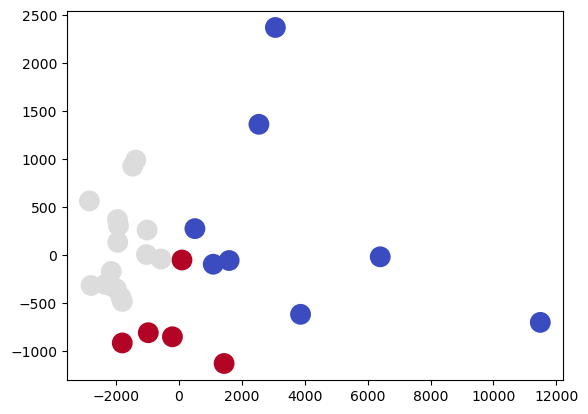

Accuracy=0.59


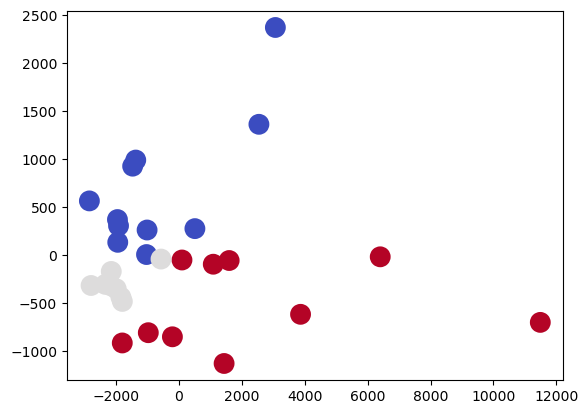

Accuracy=0.55


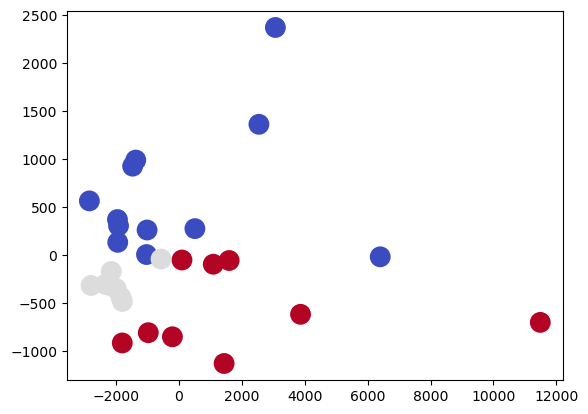

Accuracy=0.62


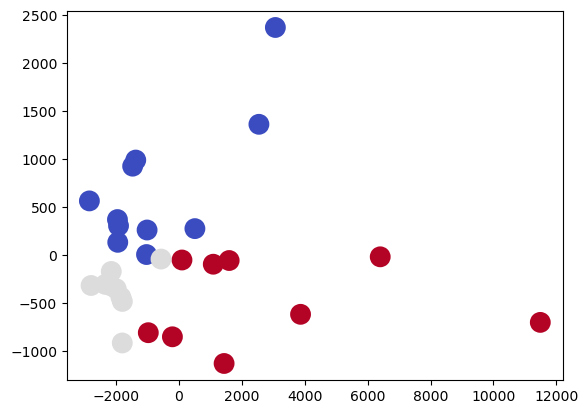

In [6]:
#训练模型，循环100次，并进行可视化
for t in range(100):
    out = net(x.float())
    loss = loss_func(out, y.long())#计算损失

    optimizer.zero_grad()#梯度归0
    loss.backward()#反向传播
    optimizer.step()#保存参数

    if t % 25 == 0:
        # plot and show learning process
        plt.cla()#清空画布
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.cpu().numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=5, cmap='coolwarm')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        print('Accuracy=%.2f' % accuracy)
        #plt.text(8.5, 8.8, 'Accuracy=%.2f' % accuracy, fontdict={'size': 15, 'color': 'red'})
        plt.pause(0.1)

    plt.show()

#保存网络及其参数
torch.save(net, './net.pkl')
torch.save(net.state_dict(), './net_params.pkl')